In [2]:
import json
import csv
import os
import scipy.fft
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
#try
from detecta import detect_peaks
from scipy.signal import savgol_filter
from scipy import stats
from scipy import integrate

In [3]:
def myfft(y):
    N = len(y)
    T = 1.0 / 100.0
    x = np.linspace(0.0, N*T, N)
    y_f = scipy.fft.fft(y)
    x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
    #plt.show()
    return x_f,2.0/N * np.abs(y_f[:N//2])
def low_pass_filter(x, cutoff, fs, order,type='float'):
    if type == 'str':
        x = [float(dx) for dx in x]
    nyquist = fs / 2
    b, a = butter(order, cutoff / nyquist)

    filtered = filtfilt(b, a, x, method='gust')
    if type == 'str':
        return [str(s) for s in filtered]
    else:
        return filtered
def NormaliseCrossCorrelation(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mu = np.mean(v)
    print(M-N+1)
    ncc_series = []
    for i in range(M-N+1):
        _a = a[i:i+N]
        a_sum = _a - np.mean(_a)
        v_sum = v - v_mu
        nr = 1/N * np.sum(a_sum*v_sum) / np.sqrt(np.var(_a)*np.var(v))
        ncc_series.append(nr)

    return ncc_series


讀檔

In [260]:
#try new readfile
origin_path = './c.台南立人里/000可用data/111027'
all_file_name = os.listdir(origin_path)
print(all_file_name)
for _ in all_file_name:
    filename = _.split('.')[1]
    if filename != 'json':all_file_name.remove(f'{_}')
print(all_file_name)
path_1 = all_file_name[0]
path_2 = all_file_name[3]
print(path_1,path_2)
filename = origin_path.split('/')
filename = filename[-1]
print(filename)
print(path_2)

['111027.csv', 'WS_2021-11-10_10-04-37-337_Acc.json', 'WS_2021-11-10_10-04-59-190_Acc.json', 'WS_2021-11-24_09-26-20-344_Acc.json', 'WS_2021-12-01_10-17-41-184_Acc.json']
['WS_2021-11-10_10-04-37-337_Acc.json', 'WS_2021-11-10_10-04-59-190_Acc.json', 'WS_2021-11-24_09-26-20-344_Acc.json', 'WS_2021-12-01_10-17-41-184_Acc.json']
WS_2021-11-10_10-04-37-337_Acc.json WS_2021-12-01_10-17-41-184_Acc.json
111027
WS_2021-12-01_10-17-41-184_Acc.json


./c.台南立人里/000可用data/111027/WS_2021-11-10_10-04-37-337_Acc.json


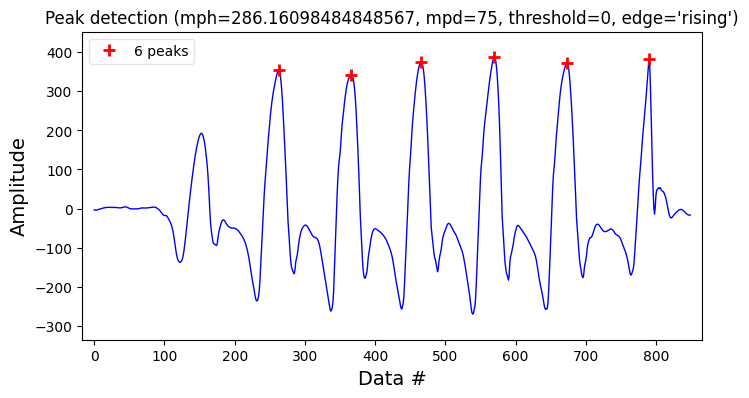

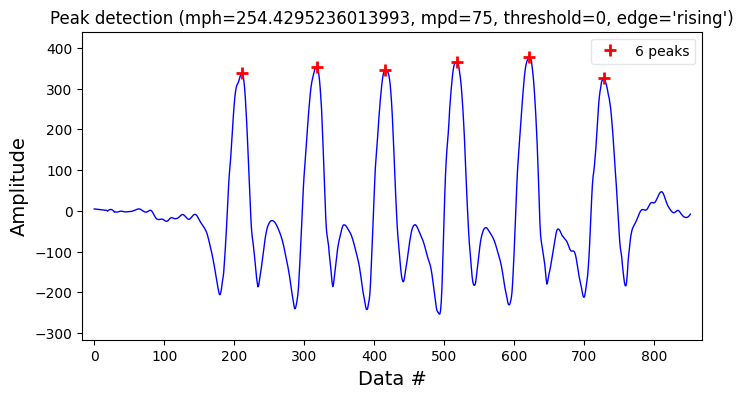

425
428
424
425
411
411
420
416
414
412
first length： [425, 428, 424, 425, 411, 411, 420, 416, 414, 412]


In [261]:
path = f'{origin_path}/{path_1}'
print(path)
with open(path) as file:
    once_data = json.load(file)
once_data['LeftFootGyro']['z'] = savgol_filter(once_data['LeftFootGyro']['z'], 11, 3)
#Left
x = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mpd = 80 )
a=[]
for i in x:
    a.append(once_data['LeftFootGyro']['z'][i]) 
# print(statistics.mean(a))
try_peak = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mph = statistics.mean(a)-15,mpd = 75 ,kpsh=True,show=True)
once_Left_five_steps=[]
for i in range(len(try_peak)):
    if try_peak[i+1]-try_peak[i] < 200: once_Left_five_steps.append(try_peak[i])
    if try_peak[i+1]-try_peak[i] >= 200 and len(once_Left_five_steps)<5:once_Left_five_steps=[]
    if len(once_Left_five_steps)==5: once_Left_five_steps.append(try_peak[i+1]);break 


#Right
once_data['RightFootGyro']['z'] = np.array(once_data['RightFootGyro']['z']) * (-1)
once_data['RightFootGyro']['z'] = savgol_filter(once_data['RightFootGyro']['z'], 11, 3)
x = detect_peaks(once_data['RightFootGyro']['z'][0:6000],mpd = 80 )
a=[]
for i in x:
    a.append(once_data['RightFootGyro']['z'][i]) 
# print(statistics.mean(a))
try_peak = detect_peaks(once_data['RightFootGyro']['z'][0:6000],mph = statistics.mean(a)-15,mpd = 75 ,kpsh=True,show=True)
once_Right_five_steps=[]
for i in range(len(try_peak)):
    if try_peak[i+1]-try_peak[i] < 200: once_Right_five_steps.append(try_peak[i])
    if try_peak[i+1]-try_peak[i] >= 200 and len(once_Right_five_steps)<5:once_Right_five_steps=[]
    if len(once_Right_five_steps)==5: once_Right_five_steps.append(try_peak[i+1]);break 

#Left x,y,z filtering
once_left_acc_fft_x = low_pass_filter(once_data['LeftFootAcc']['x'],3.3,80,4)
once_left_acc_fft_y = low_pass_filter(once_data['LeftFootAcc']['y'],3.3,80,4)
once_left_acc_fft_z = low_pass_filter(once_data['LeftFootAcc']['z'],3.3,80,4)
#Right x,y,z filtering
once_right_acc_fft_x = low_pass_filter(once_data['RightFootAcc']['x'],3.3,80,4)
once_right_acc_fft_y = low_pass_filter(once_data['RightFootAcc']['y'],3.3,80,4)
once_right_acc_fft_z = low_pass_filter(once_data['RightFootAcc']['z'],3.3,80,4)

#訊號倒置
once_left_acc_fft_x = np.array(once_left_acc_fft_x) * (-1)    
once_left_acc_fft_y = np.array(once_left_acc_fft_y) * (-1)  
once_left_acc_fft_z = np.array(once_left_acc_fft_z) * (-1)
#RSS
once_left_rss = np.sqrt(np.array(once_left_acc_fft_x)**2 + np.array(once_left_acc_fft_y)**2 + np.array(once_left_acc_fft_z)**2)
once_right_rss = np.sqrt(np.array(once_right_acc_fft_x)**2 + np.array(once_right_acc_fft_y)**2 + np.array(once_right_acc_fft_z)**2)

#left five steps
left_five = once_left_rss[once_Left_five_steps[0]:once_Left_five_steps[-1]]
left_t1 = once_left_rss[once_Left_five_steps[0]:once_Left_five_steps[1]]
left_t2 = once_left_rss[once_Left_five_steps[1]:once_Left_five_steps[2]]
left_t3 = once_left_rss[once_Left_five_steps[2]:once_Left_five_steps[3]]
left_t4 = once_left_rss[once_Left_five_steps[3]:once_Left_five_steps[4]]
left_t5 = once_left_rss[once_Left_five_steps[4]:once_Left_five_steps[5]]

#right five steps
right_five = once_right_rss[once_Right_five_steps[0]:once_Right_five_steps[-1]]    
right_t1 = once_right_rss[once_Right_five_steps[0]:once_Right_five_steps[1]]
right_t2 = once_right_rss[once_Right_five_steps[1]:once_Right_five_steps[2]]
right_t3 = once_right_rss[once_Right_five_steps[2]:once_Right_five_steps[3]]
right_t4 = once_right_rss[once_Right_five_steps[3]:once_Right_five_steps[4]]
right_t5 = once_right_rss[once_Right_five_steps[4]:once_Right_five_steps[5]]

once_left_five = left_five
once_right_five = right_five    

#left NCC(CrossCorrelation)
once_data_length = []
limit_length = 0    #取極限資料長度
for i in range(5):
    a = NormaliseCrossCorrelation(once_left_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
    once_data_length.append(len(a))
#right NCC(CrossCorrelation)
right_ncc_list = []
for i in range(5):
    a = NormaliseCrossCorrelation(once_right_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
    once_data_length.append(len(a))
print('first length：',once_data_length)

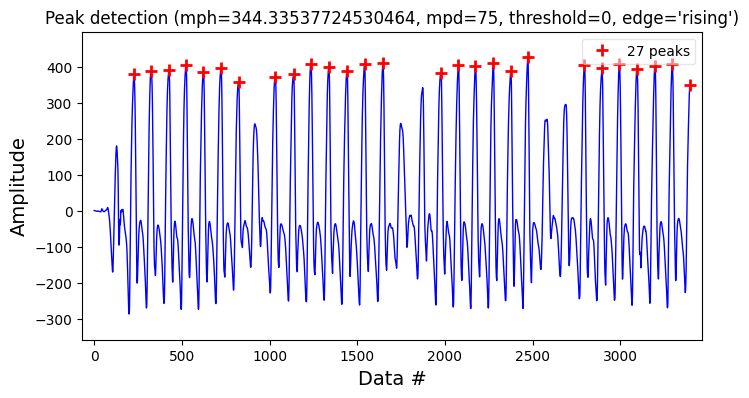

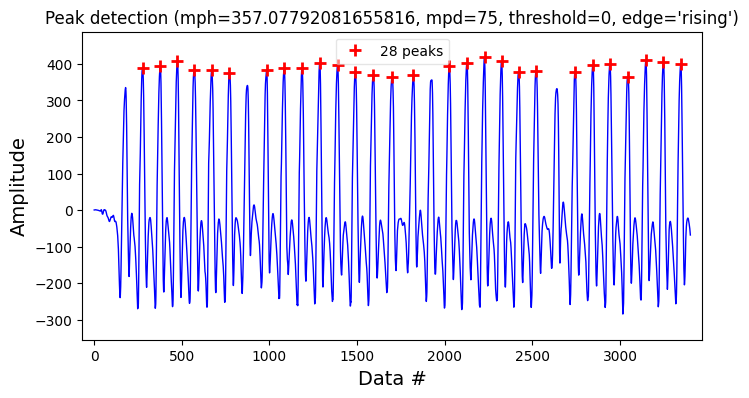

399
396
400
397
397
395
398
400
397
395
first length： [399, 396, 400, 397, 397, 395, 398, 400, 397, 395]
395


In [262]:
path = f'{origin_path}/{path_2}'
with open(path) as file:
    twice_data = json.load(file)
#Left
twice_data['LeftFootGyro']['z'] = savgol_filter(twice_data['LeftFootGyro']['z'], 11, 3)
x = detect_peaks(twice_data['LeftFootGyro']['z'][0:6000],mpd = 80 )
a=[]
for i in x:
    a.append(twice_data['LeftFootGyro']['z'][i]) 
# print(statistics.mean(a))
try_peak = detect_peaks(twice_data['LeftFootGyro']['z'][0:6000],mph = statistics.mean(a)-15,mpd = 75 ,kpsh=True,show=True)
twice_Left_five_steps=[]
for i in range(len(try_peak)):
    # if try_peak[i] < 1000:continue
    if try_peak[i+1]-try_peak[i] < 200: twice_Left_five_steps.append(try_peak[i])
    if try_peak[i+1]-try_peak[i] >= 200 and len(twice_Left_five_steps)<5:twice_Left_five_steps=[]
    if len(twice_Left_five_steps)==5: twice_Left_five_steps.append(try_peak[i+1]);break 
# print(twice_Left_five_steps)

#Right
twice_data['RightFootGyro']['z'] = np.array(twice_data['RightFootGyro']['z']) * (-1)
twice_data['RightFootGyro']['z'] = savgol_filter(twice_data['RightFootGyro']['z'], 11, 3)
x = detect_peaks(twice_data['RightFootGyro']['z'][0:6000],mpd = 80 )
a=[]
for i in x:
    a.append(twice_data['RightFootGyro']['z'][i]) 
# print(statistics.mean(a))
try_peak = detect_peaks(twice_data['RightFootGyro']['z'][0:6000],mph = statistics.mean(a)-15,mpd = 75 ,kpsh=True,show=True)
twice_Right_five_steps=[]
for i in range(len(try_peak)):
    if try_peak[i+1]-try_peak[i] < 200: twice_Right_five_steps.append(try_peak[i])
    if try_peak[i+1]-try_peak[i] >= 200 and len(twice_Right_five_steps)<5:twice_Right_five_steps=[]
    if len(twice_Right_five_steps)==5: twice_Right_five_steps.append(try_peak[i+1]);break 

#Left x,y,z
twice_left_acc_fft_x = low_pass_filter(twice_data['LeftFootAcc']['x'],3.3,80,4)
twice_left_acc_fft_y = low_pass_filter(twice_data['LeftFootAcc']['y'],3.3,80,4)
twice_left_acc_fft_z = low_pass_filter(twice_data['LeftFootAcc']['z'],3.3,80,4)
#Right x,y,z
twice_right_acc_fft_x = low_pass_filter(twice_data['RightFootAcc']['x'],3.3,80,4)
twice_right_acc_fft_y = low_pass_filter(twice_data['RightFootAcc']['y'],3.3,80,4)
twice_right_acc_fft_z = low_pass_filter(twice_data['RightFootAcc']['z'],3.3,80,4)

#訊號倒置
twice_left_acc_fft_x = np.array(twice_left_acc_fft_x) * (-1)    
twice_left_acc_fft_y = np.array(twice_left_acc_fft_y) * (-1)  
twice_left_acc_fft_z = np.array(twice_left_acc_fft_z) * (-1)
#RSS
twice_left_rss = np.sqrt(np.array(twice_left_acc_fft_x)**2 + np.array(twice_left_acc_fft_y)**2 + np.array(twice_left_acc_fft_z)**2)
twice_right_rss = np.sqrt(np.array(twice_right_acc_fft_x)**2 + np.array(twice_right_acc_fft_y)**2 + np.array(twice_right_acc_fft_z)**2)

#left five steps
left_five = twice_left_rss[twice_Left_five_steps[0]:twice_Left_five_steps[-1]]
left_t1 = twice_left_rss[twice_Left_five_steps[0]:twice_Left_five_steps[1]]
left_t2 = twice_left_rss[twice_Left_five_steps[1]:twice_Left_five_steps[2]]
left_t3 = twice_left_rss[twice_Left_five_steps[2]:twice_Left_five_steps[3]]
left_t4 = twice_left_rss[twice_Left_five_steps[3]:twice_Left_five_steps[4]]
left_t5 = twice_left_rss[twice_Left_five_steps[4]:twice_Left_five_steps[5]]

#right five steps
right_five = twice_right_rss[twice_Right_five_steps[0]:twice_Right_five_steps[-1]]    
right_t1 = twice_right_rss[twice_Right_five_steps[0]:twice_Right_five_steps[1]]
right_t2 = twice_right_rss[twice_Right_five_steps[1]:twice_Right_five_steps[2]]
right_t3 = twice_right_rss[twice_Right_five_steps[2]:twice_Right_five_steps[3]]
right_t4 = twice_right_rss[twice_Right_five_steps[3]:twice_Right_five_steps[4]]
right_t5 = twice_right_rss[twice_Right_five_steps[4]:twice_Right_five_steps[5]]

twice_left_five = left_five
twice_right_five = right_five 

#left NCC(CrossCorrelation)
twice_data_length = []
for i in range(5):
    a2 = NormaliseCrossCorrelation(twice_left_five,twice_left_rss[twice_Left_five_steps[i]:twice_Left_five_steps[i+1]])
    twice_data_length.append(len(a2))   
plt.show()
#right NCC(CrossCorrelation)
right_ncc_list = []
for i in range(5):
    a2 = NormaliseCrossCorrelation(twice_right_five,twice_right_rss[twice_Right_five_steps[i]:twice_Right_five_steps[i+1]])
    twice_data_length.append(len(a2))
print('first length：',twice_data_length) 

#find min length 
limit_length = min(min(once_data_length),min(twice_data_length))
print(limit_length)

NCC calculation

425
428
424
425
411


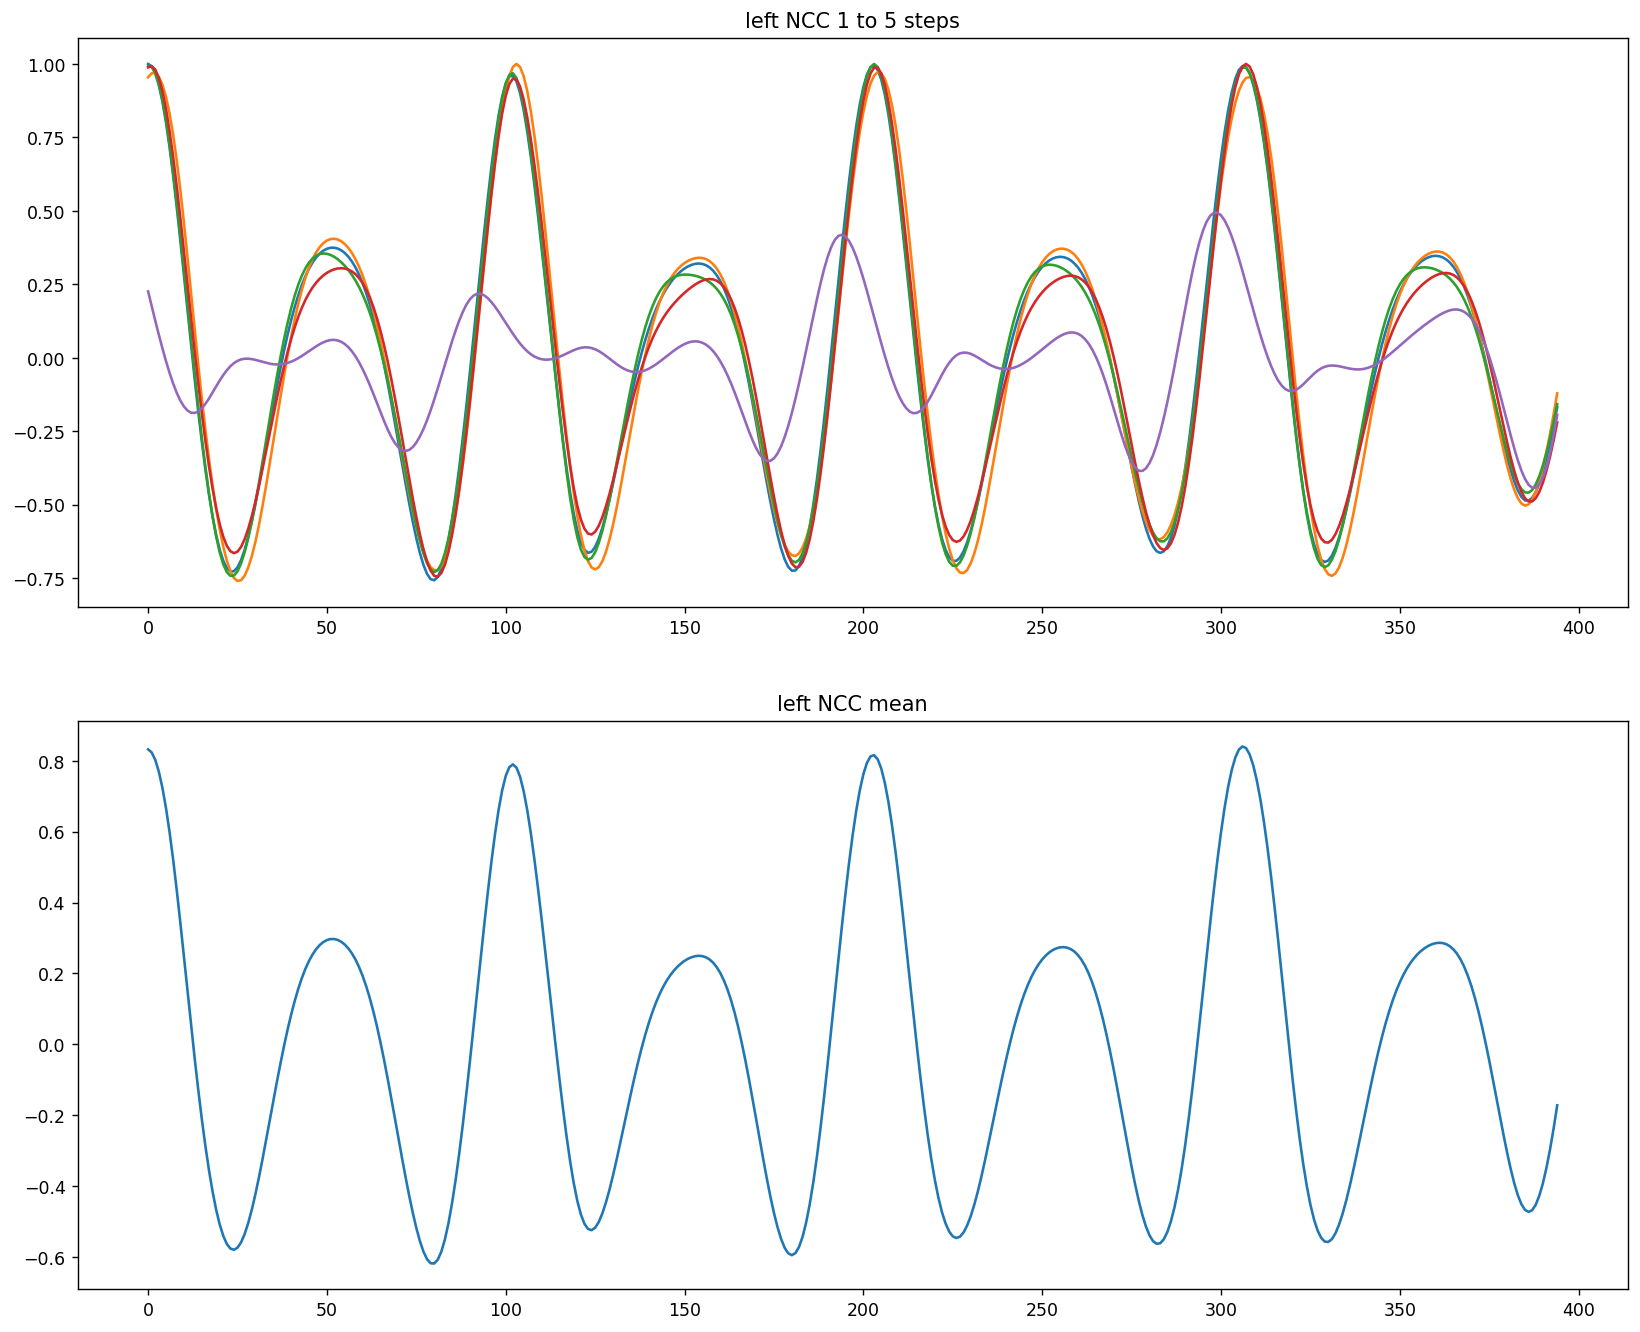

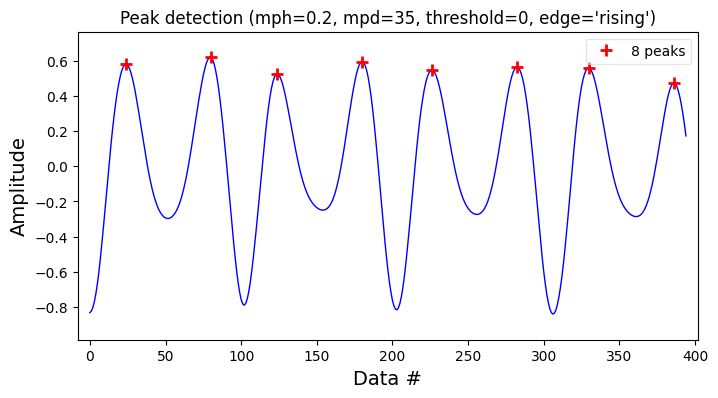

left 下面積1為： -4.31616671389982
left 下面積2為： 4.316643781504425
left 下面積3為： -3.798866938275081
left 下面積4為： 4.7908457493106456
left 下面積5為： -3.550198991802011
left 下面積6為： 5.620819965572672
left 下面積7為： -1.7117819075661493
第一次數據NCC曲線下面積(左腳)： [4.31616671389982, 4.316643781504425, 3.798866938275081, 4.7908457493106456, 3.550198991802011, 5.620819965572672, 1.7117819075661493]
411
420
416
414
412


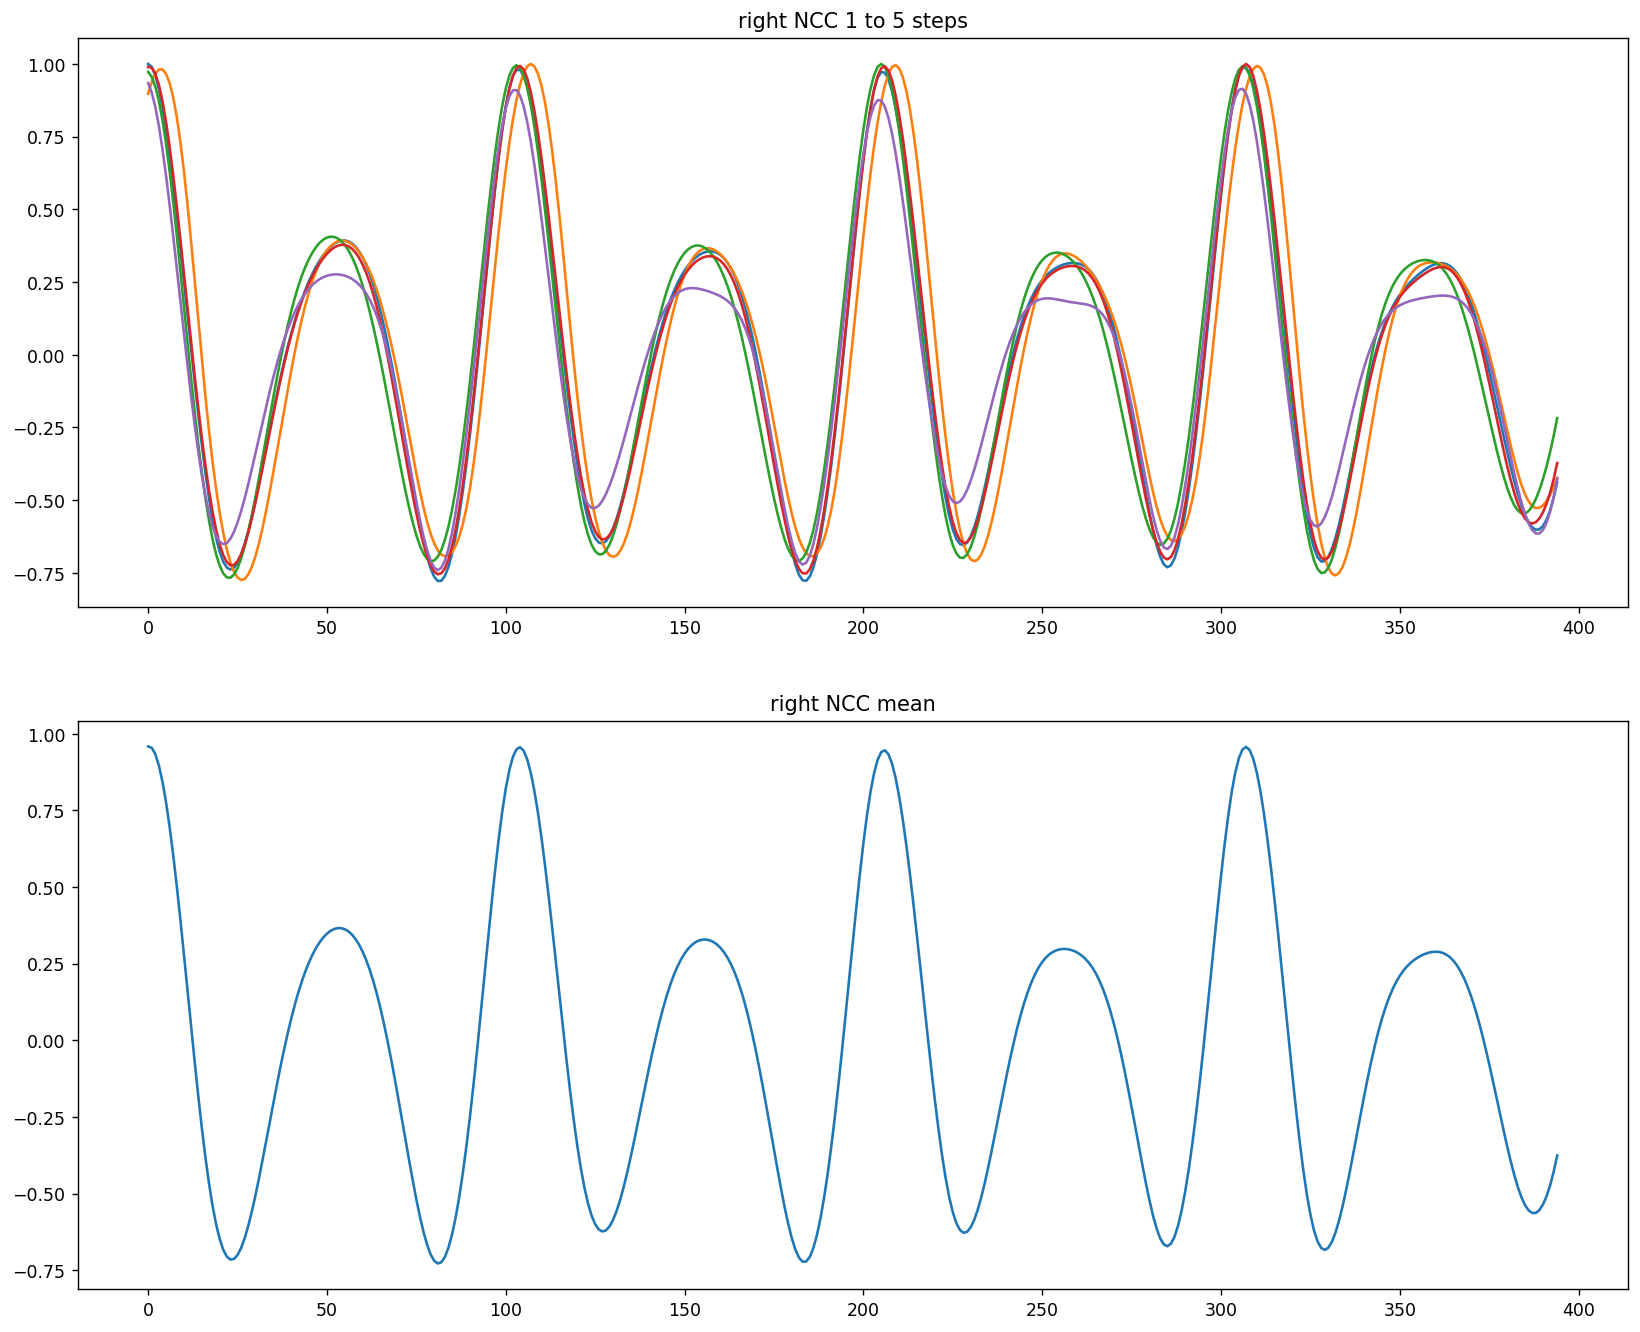

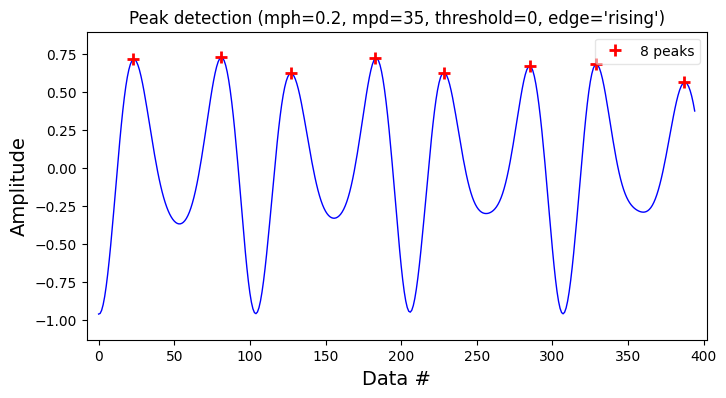

right 下面積1為： -4.890486713518953
right 下面積2為： 5.206901620913437
right 下面積3為： -4.218181221934504
right 下面積4為： 5.157762356507619
right 下面積5為： -3.9011133806448304
right 下面積6為： 5.816583574846966
right 下面積7為： -3.4561171265882127
第一次數據NCC曲線下面積(右腳)： [4.890486713518953, 5.206901620913437, 4.218181221934504, 5.157762356507619, 3.9011133806448304, 5.816583574846966, 3.4561171265882127]


In [263]:
#once left NCC
once_left_ncc_list = []
plt.figure(figsize=(16,13),dpi=125)
ax1 = plt.subplot(211)
for i in range(5):
    a = NormaliseCrossCorrelation(once_left_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
    once_left_ncc_list.append(a[0:limit_length])
    plt.plot(a[0:limit_length],label=f'left_step{i}-5')
plt.title('left NCC 1 to 5 steps')
#once left NCC mean
ax2 = plt.subplot(212)
left_ncc1 = np.mean(once_left_ncc_list, axis=0)
plt.plot(left_ncc1)
plt.title('left NCC mean')
plt.show()
#left(不分)
y = detect_peaks(left_ncc1*(-1),mpd = 35,mph=0.2,show=True )
left_ncc_area_once=[]
for _ in range(len(y)):
    try:
        x_a=np.arange(y[_],y[_+1],1)
        y_a=left_ncc1[y[_]:y[_+1]]
        area = integrate.trapz(y_a, x_a)
        print(f'left 下面積{_+1}為：', area)
        left_ncc_area_once.append(abs(area))
    except:break
print('第一次數據NCC曲線下面積(左腳)：',left_ncc_area_once)
#once right NCC
once_right_ncc_list = []
plt.figure(figsize=(16,13),dpi=125)
ax1 = plt.subplot(211)
for i in range(5):
    a = NormaliseCrossCorrelation(once_right_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
    once_right_ncc_list.append(a[0:limit_length])
    plt.plot(a[0:limit_length],label=f'right_step{i}-5')
plt.title('right NCC 1 to 5 steps')
#once right NCC mean
ax2 = plt.subplot(212)
right_ncc1 = np.mean(once_right_ncc_list, axis=0)
plt.plot(right_ncc1)
plt.title('right NCC mean')
plt.show()
#right(不分) 
y = detect_peaks(right_ncc1*(-1),mpd = 35 ,mph=0.2,show=True)
right_ncc_area_once=[]
for _ in range(len(y)):
    try:
        x_b=np.arange(y[_],y[_+1],1)
        y_b=right_ncc1[y[_]:y[_+1]]
        area = integrate.trapz(y_b, x_b)
        print(f'right 下面積{_+1}為：', area)
        right_ncc_area_once.append(abs(area))
    except:break
print('第一次數據NCC曲線下面積(右腳)：',right_ncc_area_once)


399
396
400
397
397


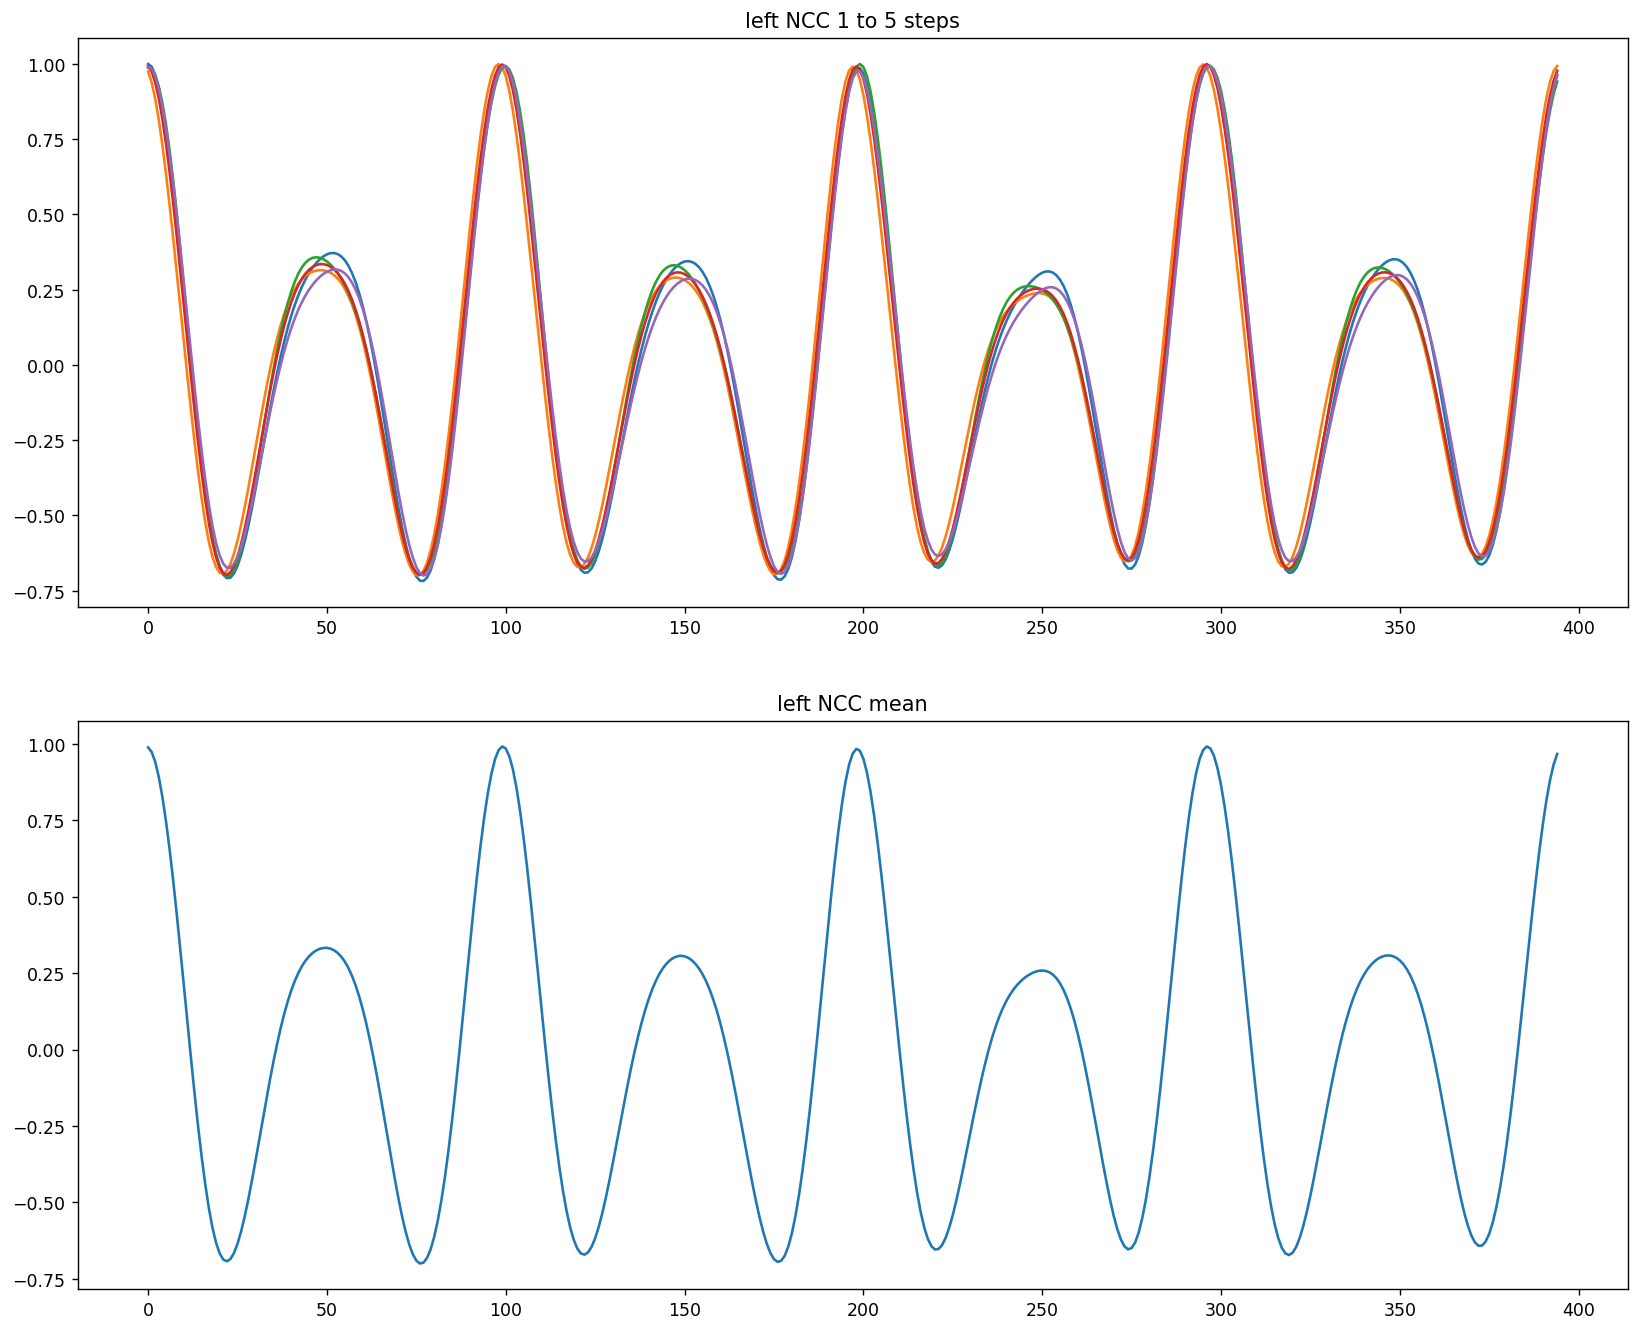

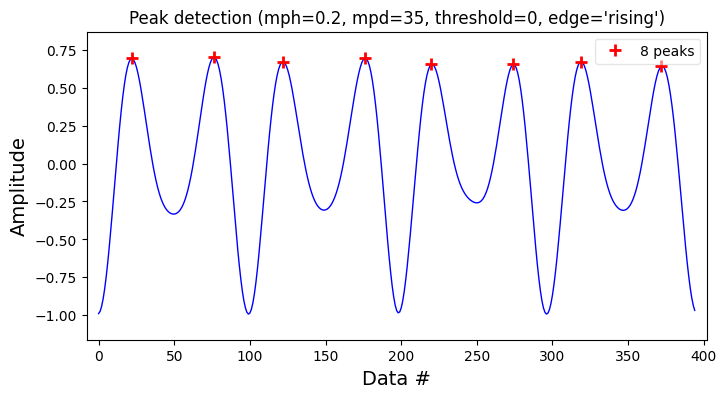

8
left 下面積1為： -4.216672038170273
left 下面積2為： 5.539141840519956
left 下面積3為： -5.264423666737442
left 下面積4為： 5.642954653905441
left 下面積5為： -5.388329211302333
left 下面積6為： 6.716887449327436
left 下面積7為： -4.115502198607887
第二次數據NCC曲線下面積(左腳)： [4.216672038170273, 5.539141840519956, 5.264423666737442, 5.642954653905441, 5.388329211302333, 6.716887449327436, 4.115502198607887]
395
398
400
397
395


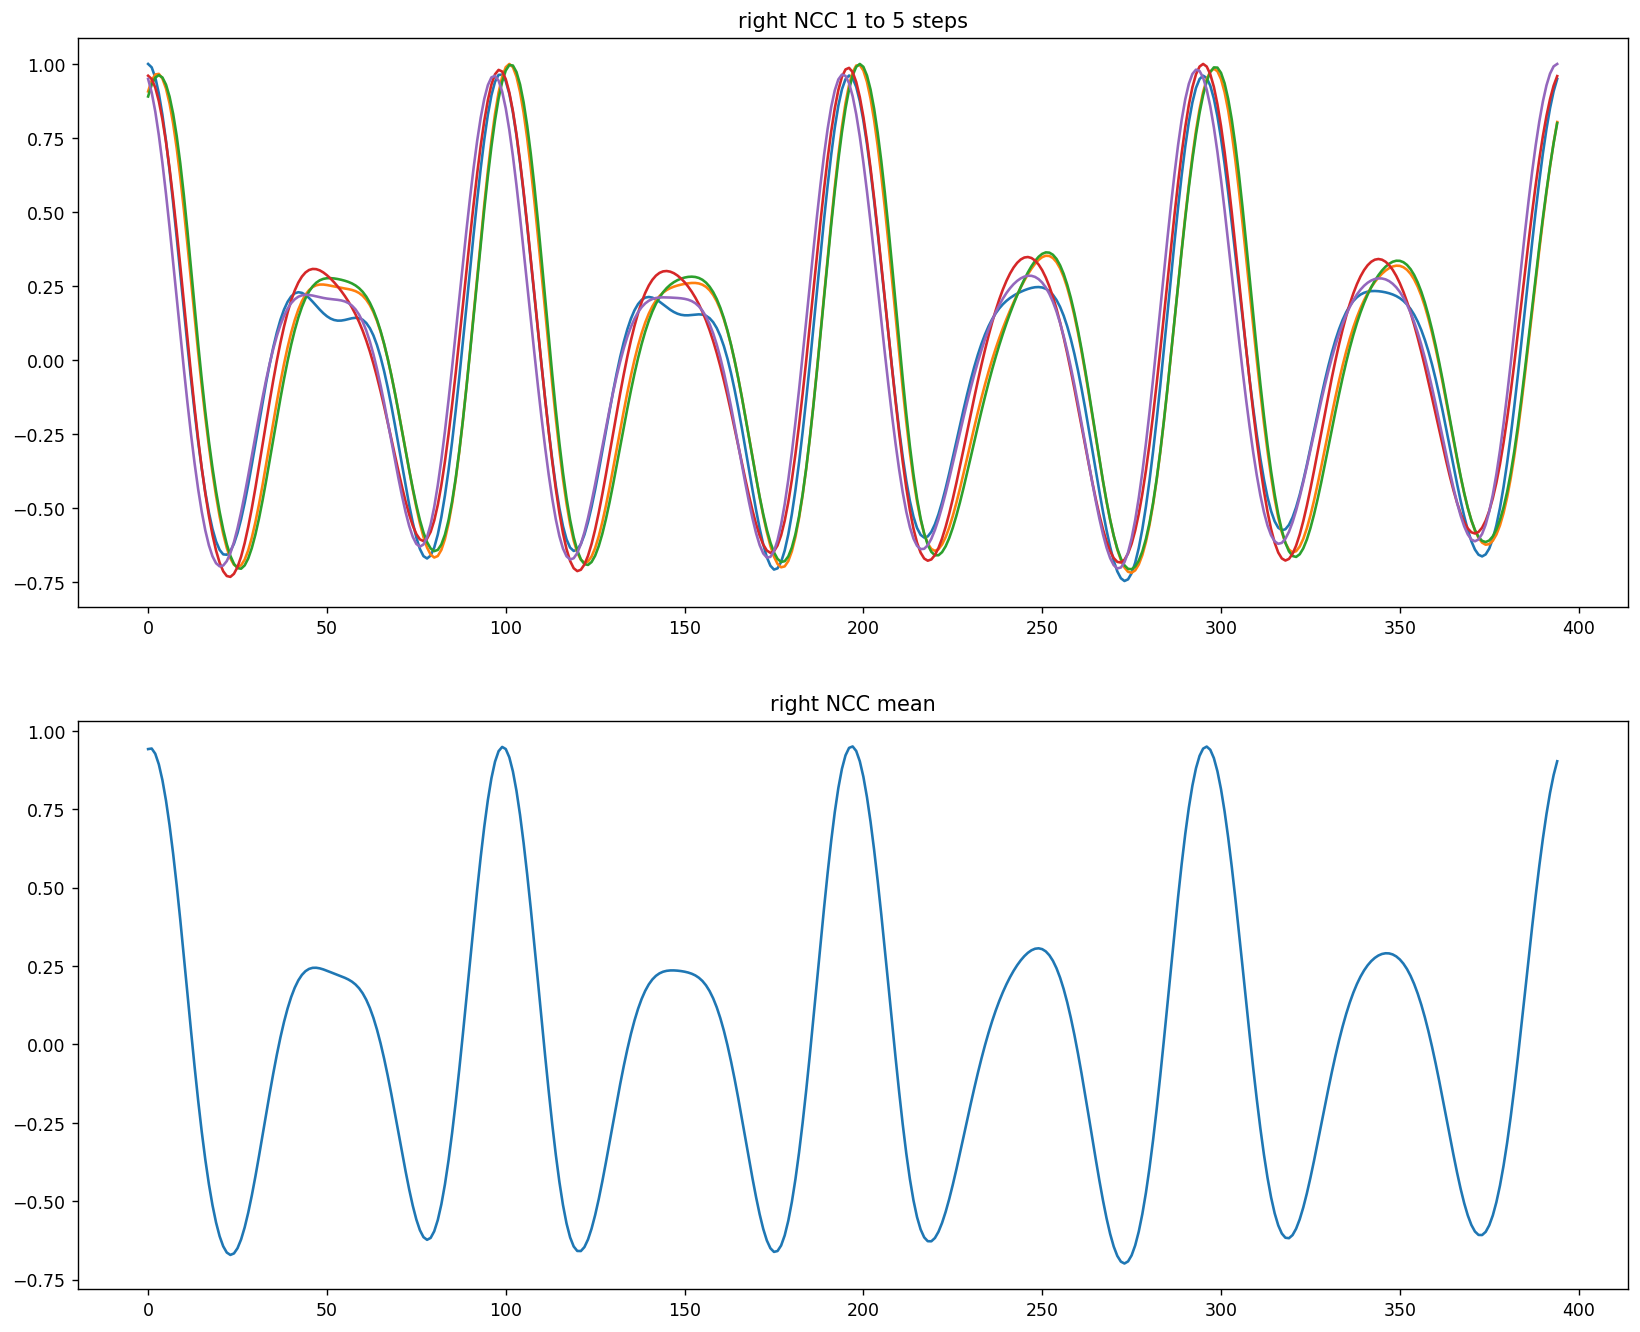

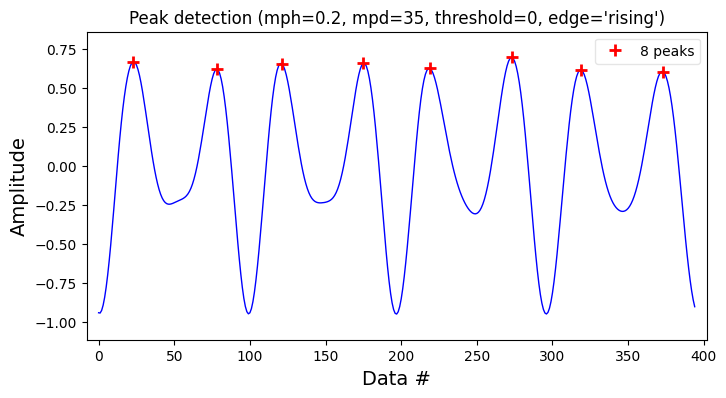

8
Y= 8
right 下面積1為： -4.346911592636353
right 下面積2為： 5.642993871196697
right 下面積3為： -4.370299607334316
right 下面積4為： 5.477480157298482
right 下面積5為： -5.056721568629521
right 下面積6為： 5.692751217976882
right 下面積7為： -4.305510061083914
第二次數據NCC曲線下面積(右腳)： [4.346911592636353, 5.642993871196697, 4.370299607334316, 5.477480157298482, 5.056721568629521, 5.692751217976882, 4.305510061083914]


In [264]:
#twice left NCC
twice_left_ncc_list = []
plt.figure(figsize=(16,13),dpi=125)
ax1 = plt.subplot(211)
for i in range(5):
    a2 = NormaliseCrossCorrelation(twice_left_five,twice_left_rss[twice_Left_five_steps[i]:twice_Left_five_steps[i+1]])
    twice_left_ncc_list.append(a2[0:limit_length])
    plt.plot(a2[0:limit_length],label=f'left_step{i}-5')   
plt.title('left NCC 1 to 5 steps')
#twice left NCC mean
ax2 = plt.subplot(212)
left_ncc2 = np.mean(twice_left_ncc_list, axis=0)
plt.plot(left_ncc2)
plt.title('left NCC mean')
plt.show()
#left(不分)
y = detect_peaks(left_ncc2*(-1),mpd = 35,mph=0.2,show=True) #,show=True

#特殊情況(修)
# y = list(y)
# y.append(len(left_ncc2)-1)

print(len(y))
# print('left_ncc2=',left_ncc2[y[6]:y[7]])
left_ncc_area_twice=[]
for _ in range(len(y)):
    try:
        x_a=np.arange(y[_],y[_+1],1)
        y_a=left_ncc2[y[_]:y[_+1]]
        area = integrate.trapz(y_a, x_a)
        print(f'left 下面積{_+1}為：', area)
        left_ncc_area_twice.append(abs(area))
    except:break
print('第二次數據NCC曲線下面積(左腳)：',left_ncc_area_twice)
#twice right NCC
twice_right_ncc_list = []
plt.figure(figsize=(16,13),dpi=125)
ax1 = plt.subplot(211)
for i in range(5):
    a2 = NormaliseCrossCorrelation(twice_right_five,twice_right_rss[twice_Right_five_steps[i]:twice_Right_five_steps[i+1]])
    twice_right_ncc_list.append(a2[0:limit_length])
    plt.plot(a2[0:limit_length],label=f'right_step{i}-5')
plt.title('right NCC 1 to 5 steps')
#twice right NCC mean
ax2 = plt.subplot(212)
right_ncc2 = np.mean(twice_right_ncc_list, axis=0)
plt.plot(right_ncc2)
plt.title('right NCC mean')
plt.show()
#right(不分) 
y = detect_peaks(right_ncc2*(-1),mpd = 35 ,mph=0.2,show=True)

#特殊情況(修)
# y = list(y)
# y.append(len(right_ncc2)-1)

print(len(y))
right_ncc_area_twice=[]
print('Y=',len(y))
for _ in range(len(y)):
    try:
        x_b=np.arange(y[_],y[_+1],1)
        y_b=right_ncc2[y[_]:y[_+1]]
        area = integrate.trapz(y_b, x_b)
        print(f'right 下面積{_+1}為：', area)
        right_ncc_area_twice.append(abs(area))
    except:break
print('第二次數據NCC曲線下面積(右腳)：',right_ncc_area_twice)


In [265]:
# print('第一次數據NCC曲線下面積(左腳)：',left_ncc_area_once)
# print('第一次數據NCC曲線下面積(右腳)：',right_ncc_area_once)
# print('第二次數據NCC曲線下面積(左腳)：',left_ncc_area_twice)
# print('第二次數據NCC曲線下面積(右腳)：',right_ncc_area_twice)
#(前)Left
once_left_area = []
if isinstance(left_ncc_area_once[0],float) is True:left_ncc_area_once.insert(0,'前次左腳NCC面積序列')
with open (f'{origin_path}/{filename}.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(left_ncc_area_once)
#(前)Right
once_right_area = []
if isinstance(right_ncc_area_once[0],float) is True:right_ncc_area_once.insert(0,'前次右腳NCC面積序列')
with open (f'{origin_path}/{filename}.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(right_ncc_area_once)
#(後)Left
twice_left_area = []
if isinstance(left_ncc_area_twice[0],float) is True:left_ncc_area_twice.insert(0,'後次左腳NCC面積序列')
with open (f'{origin_path}/{filename}.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(left_ncc_area_twice)
#(後)Right
twice_right_area = []
if isinstance(right_ncc_area_twice[0],float) is True:right_ncc_area_twice.insert(0,'後次右腳NCC面積序列')
with open (f'{origin_path}/{filename}.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(right_ncc_area_twice)